In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Continuous Wavelet Transform

In [2]:
%pylab inline
from scipy import signal
import cwt

Populating the interactive namespace from numpy and matplotlib


## Mexican hat wavelet

$$
\psi_\text{Morlet}(t) =
\left( 1 - \left(\frac{t}{\alpha}\right)^2 \right) \cdot
\mathsf{e}^{-\frac{1}{2} \left( \frac{t}{\alpha} \right)^2}
$$

In [3]:
def mexican_hat_wavelet(t, alpha):
    return (1 - (t / alpha)**2) * exp(-.5 * (t / alpha)**2)

In [4]:
alphas = [.5, 1.0, 1.5]
t = linspace(-5, 5, 201)
wavelets = []
for alpha in alphas:
    wavelets.append(mexican_hat_wavelet(t, alpha))

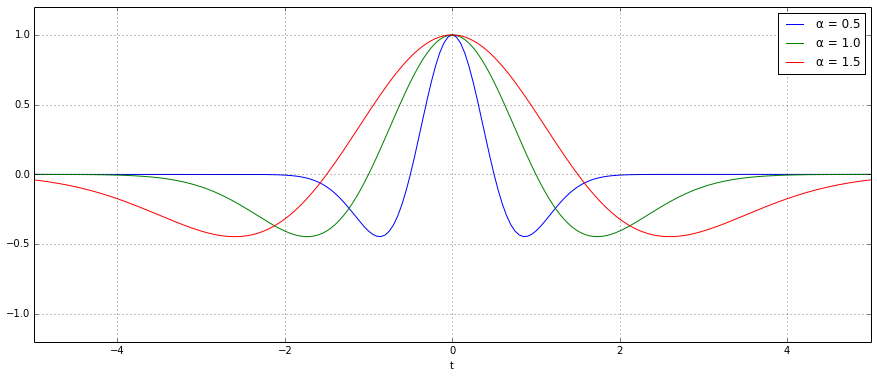

In [5]:
figure(figsize(15, 6))
legend = []
for wavelet, alpha in zip(wavelets, alphas):    
    plt.plot(t, wavelet)
    plt.xlabel('t')
    legend.append(u'α = {0}'.format(alpha))
plt.legend(legend)
plt.xlim(-5, 5), plt.ylim(-1.2, 1.2)
plt.grid();

## Morlet wavelet

$$
\psi_\text{Morlet}(t) =
\mathsf{e}^{-\alpha t^2} \cdot \mathsf{e}^{\mathsf{i} \omega t}
$$

In [6]:
def morlet_wavelet(t, alpha, omega):
    return exp(-alpha * t**2) * exp(1j * omega * t)

In [7]:
alphas = [4.0, 4.0, 16.0, 16.0]
freqs = [2.0, 4.0, 2.0, 4.0]
t = linspace(-1.5, 1.5, 201)
wavelets = []
for alpha, freq in zip(alphas, freqs):
    wavelets.append(morlet_wavelet(t, alpha, 2*pi*freq))

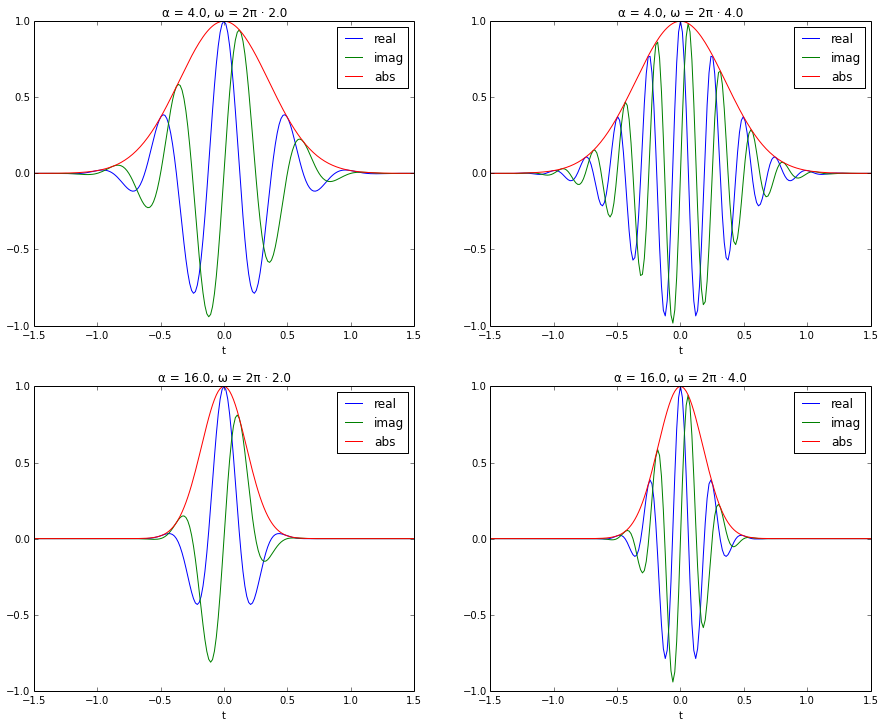

In [8]:
n = int(len(wavelets) / 2 + 0.5)
figure(figsize(15, 6*n))
i = 1
for wavelet, alpha, freq in zip(wavelets, alphas, freqs):
    plt.subplot(n, 2, i)
    plt.plot(t, wavelet.real)
    plt.plot(t, wavelet.imag)
    plt.plot(t, abs(wavelet))
    plt.xlabel('t')
    plt.legend(['real', 'imag', 'abs'])
    plt.title(u'α = {0}, ω = 2π · {1}'.format(alpha, freq))
    i += 1

## Complex Shannon wavelet

$$
\psi_\text{Shannon}(t) =
\sqrt{\alpha} ~ \mathsf{sinc}(\alpha t) \cdot
\mathsf{e}^{\mathsf{i} \omega t}
\quad \text{with} \quad \mathsf{sinc}(x) = \frac{\sin(\pi x)}{\pi x}
$$

In [9]:
def shannon_wavelet(t, alpha, omega):
    wavelet = sqrt(alpha) * sinc(alpha * t) * exp(1j * omega * t)
    return wavelet

In [10]:
alphas = [2.0, 2.0, 4.0, 4.0]
freqs = [2.0, 4.0, 2.0, 4.0]
t = linspace(-1.5, 1.5, 201)
wavelets = []
for alpha, freq in zip(alphas, freqs):
    wavelets.append(shannon_wavelet(t, alpha, 2*pi*freq))

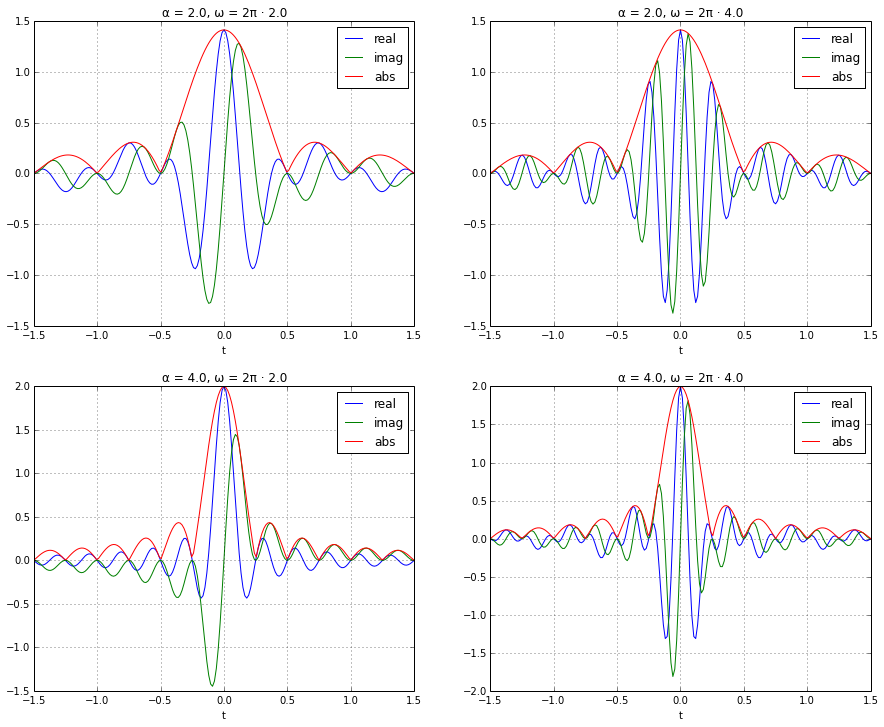

In [11]:
n = int(len(wavelets) / 2 + 0.5)
figure(figsize(15, 6*n))
i = 1
for wavelet, alpha, freq in zip(wavelets, alphas, freqs):
    plt.subplot(n, 2, i)
    plt.plot(t, wavelet.real)
    plt.plot(t, wavelet.imag)
    plt.plot(t, abs(wavelet))
    plt.xlabel('t')
    plt.legend(['real', 'imag', 'abs'])
    plt.title(u'α = {0}, ω = 2π · {1}'.format(alpha, freq))
    plt.grid()
    i += 1

## Continuous Wavelet Transform

### Example 1

#### Definition the signal

In [12]:
t = np.linspace(0, .25, 256, endpoint=False)
s1 = sin(2 * pi * 8 * t)
s2 = sin(2 * pi * 16 * t)
s3 = sin(2 * pi * 32 * t)
s4 = sin(2 * pi * 64 * t)
sig = np.append(np.append(np.append(s1, s2), s3), s4)

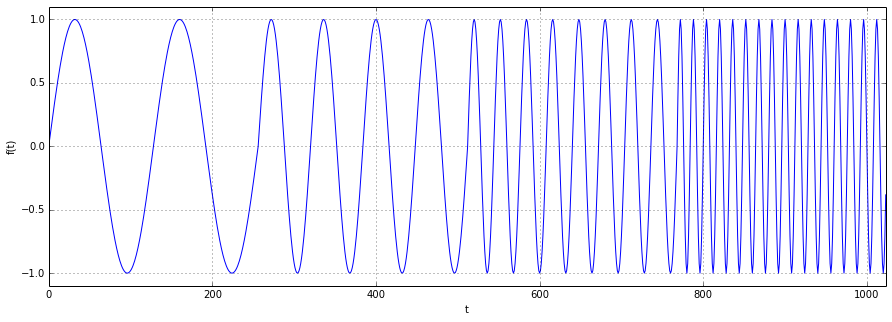

In [13]:
figure(figsize(15, 5))
plt.plot(sig)
plt.xlim(0,1023), plt.ylim(-1.1, 1.1), plt.grid()
plt.xlabel('t'), plt.ylabel('f(t)');

#### CWT using SciPy

In [14]:
scales = 1 / linspace(0.01, .5, 200)
cwtmatr = signal.cwt(sig, signal.ricker, scales)

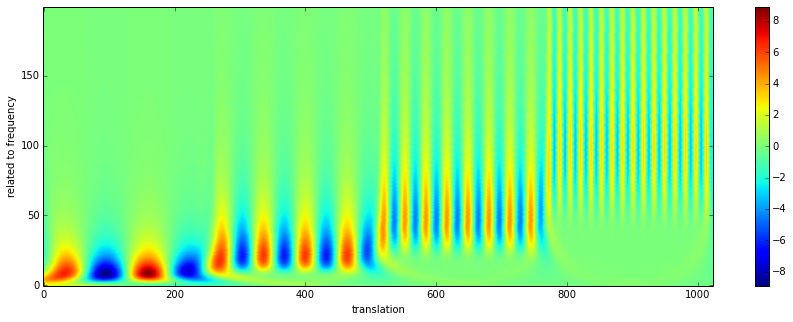

In [15]:
figure(figsize(15, 5))
plt.imshow(cwtmatr, aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max(), origin='lower')
plt.xlabel('translation'), plt.ylabel('related to frequency'), plt.colorbar();

#### CWT using code by Dr. André Bergner, University of Potsdam

The code contains 5 TODOs and even 4 FIXMEs. However, it works with complex wavelets and the results make sense.

In [16]:
fmax = 0.25
frequencies1 = fmax * np.arange( 0.01 , 5.5, 0.01) / 5.5
frequencies2 = fmax * np.exp(np.arange( -5.5 , 0.0 , 0.01 ))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    res1 = cwt.cwt(sig, frequencies=frequencies1, wavelet=cwt.morlet, dev=5)[0]
    res2 = cwt.cwt(sig, frequencies=frequencies1, wavelet=cwt.cauchy, dev=100)[0]

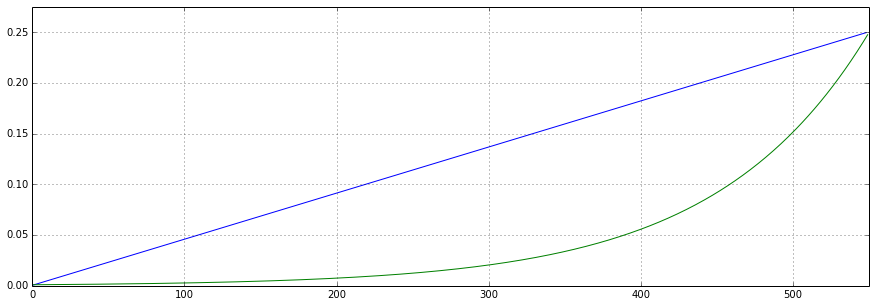

In [17]:
figure(figsize(15,5))
plt.plot(frequencies1), plt.plot(frequencies2)
plt.xlim(0,550), plt.ylim(0, 1.1*fmax), plt.grid();

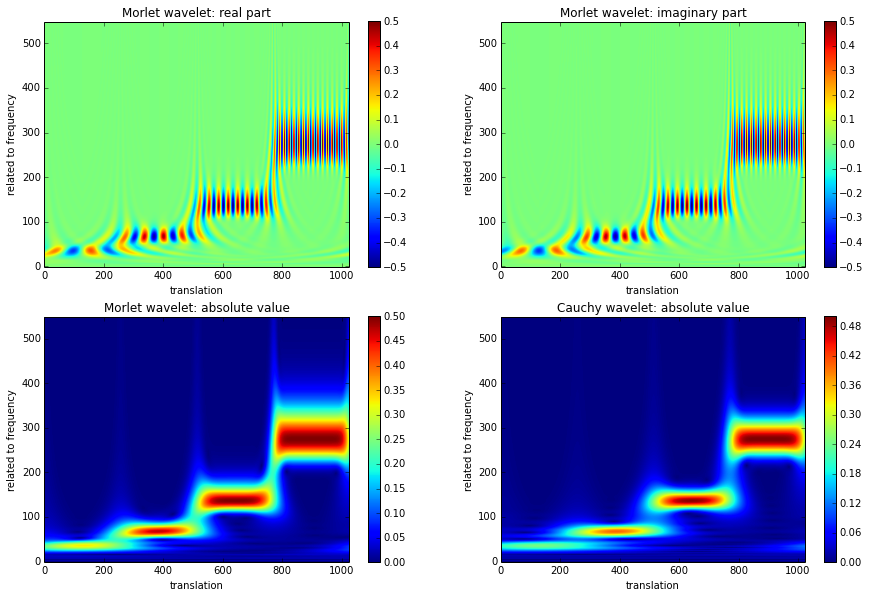

In [18]:
figure(figsize(15,9.7))
plt.subplot(2,2,1), plt.imshow(res1.real, origin='lower', aspect=1.5)
plt.colorbar(), plt.title('Morlet wavelet: real part')
plt.xlabel('translation'), plt.ylabel('related to frequency')
plt.subplot(2,2,2), plt.imshow(res1.imag, origin='lower', aspect=1.5)
plt.colorbar(), plt.title('Morlet wavelet: imaginary part')
plt.xlabel('translation'), plt.ylabel('related to frequency')
plt.subplot(2,2,3), plt.imshow(abs(res1), origin='lower', aspect=1.5)
plt.colorbar(), plt.title('Morlet wavelet: absolute value')
plt.xlabel('translation'), plt.ylabel('related to frequency');
plt.subplot(2,2,4), plt.imshow(abs(res2), origin='lower', aspect=1.5)
plt.colorbar(), plt.title('Cauchy wavelet: absolute value')
plt.xlabel('translation'), plt.ylabel('related to frequency');

In [19]:
if False:
    methods = ['real', 'imag', 'abs']
    for method_name in methods:
        method = getattr(np, method_name)
        fig = figure(figsize(8,5))
        plt.imshow(method(res1), origin='lower', aspect=1.5), plt.colorbar()
        plt.xlabel('translation [samples]', size=12)
        plt.ylabel('related to frequency', size=12)
        fig.savefig('cwt1_cmorl_{0}.pdf'.format(method_name), format='pdf', dpi=100)
        plt.close()

### Example 2

#### Definition of the signal

In [20]:
t = np.linspace(0, 1, 1024, endpoint=False)
sig = sin(2 * pi * 64 * t) - sign(t - 0.2) - sign(0.5 - t)

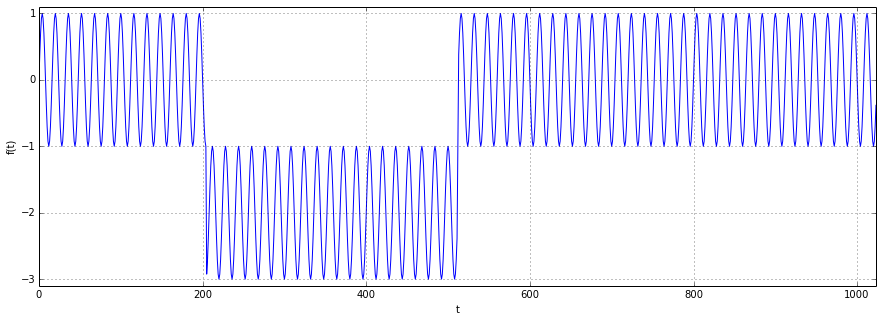

In [21]:
figure(figsize(15, 5))
plt.plot(sig)
plt.xlim(0,1023), plt.ylim(-3.1, 1.1), plt.grid()
plt.xlabel('t'), plt.ylabel('f(t)');

#### CWT using code by Dr. André Bergner, University of Potsdam

In [22]:
fmax = .25
frequencies1 = fmax * np.arange( 0.01 , 5.5, 0.01) / 5.5
frequencies2 = fmax * np.exp(np.arange( -5.5 , 0.0 , 0.01 ))
res = cwt.cwt(sig, frequencies=frequencies2, wavelet=cwt.morlet, dev=5)[0]

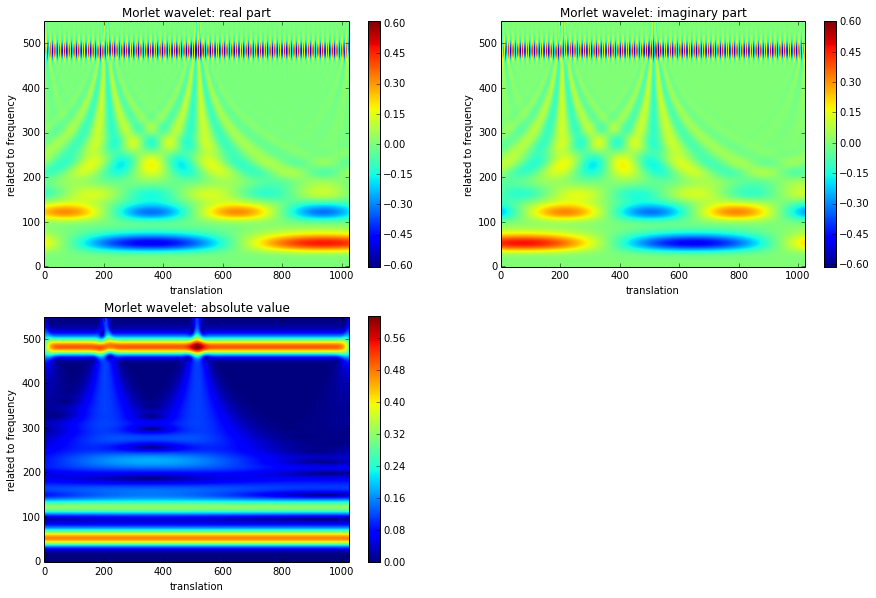

In [23]:
figure(figsize(15,9.7))
plt.subplot(2,2,1), plt.imshow(res.real, origin='lower', aspect=1.5)
plt.colorbar(), plt.title('Morlet wavelet: real part')
plt.xlabel('translation'), plt.ylabel('related to frequency')
plt.subplot(2,2,2), plt.imshow(res.imag, origin='lower', aspect=1.5)
plt.colorbar(), plt.title('Morlet wavelet: imaginary part')
plt.xlabel('translation'), plt.ylabel('related to frequency')
plt.subplot(2,2,3), plt.imshow(abs(res), origin='lower', aspect=1.5)
plt.colorbar(), plt.title('Morlet wavelet: absolute value')
plt.xlabel('translation'), plt.ylabel('related to frequency');

In [24]:
if False:
    methods = ['real', 'imag', 'abs']
    for method_name in methods:
        method = getattr(np, method_name)
        fig = figure(figsize(8,5))
        plt.imshow(method(res), origin='lower', aspect=1.5), plt.colorbar()
        plt.xlabel('translation [samples]', size=12)
        plt.ylabel('related to frequency', size=12)
        fig.savefig('cwt2_cmorl_{0}.pdf'.format(method_name), format='pdf', dpi=100)
        plt.close()